In [9]:
from subsbml import System, createSubsystem, combineSystems, createNewSubsystem
import libsbml
import bioscrape




liposome_1_ss1 = createSubsystem('liposome_1.xml')
liposome_2_ss2 = createSubsystem('liposome_2.xml')
external_ss3 = createSubsystem('external_environment.xml')

#mb1 = createSubsystem('membrane_ahl.xml', membrane = True)
mb1 = createSubsystem('membrane_ahl_simple1.xml', membrane = True)


liposome_1 = System('liposome_1')
liposome_2 = System('liposome_2')



liposome_1.setInternal([liposome_1_ss1])
liposome_1.setExternal([external_ss3])
liposome_1.setMembrane(mb1)
liposome_1.setSize(1e-06)


liposome_1_model = liposome_1.getModel(verbose = True)
liposome_1_model.writeSBML('liposome_1_model.xml')

#mb2 = createSubsystem('membrane_ahl.xml', membrane = True)
mb2 = createSubsystem('membrane_ahl_simple2.xml', membrane = True)


liposome_2.setInternal([liposome_2_ss2])
liposome_2.setExternal([external_ss3])
liposome_2.setMembrane(mb2)
liposome_2.setSize(2e-06)



liposome_2_model = liposome_2.getModel()
liposome_2_model.writeSBML('liposome_2_model.xml')


#combined_liposome_1_2 = combineSystems([liposome_1, liposome_2])
liposome_1_model.renameCompartments('liposome_1_external', 'actual_external_compartment')
liposome_2_model.renameCompartments('liposome_2_external', 'actual_external_compartment')





combined_liposome_1_2 = createNewSubsystem()
combined_liposome_1_2.combineSubsystems([liposome_1_model, liposome_2_model], verbose = True)

#membrane species
#combined_liposome_1_2.setSpeciesAmount('ahl', 1)
#combined_liposome_1_2.setSpeciesAmount('ahl', 1)
    
#Liposome 1 species amount
combined_liposome_1_2.setSpeciesAmount('TRP', 10, compartment = 'liposome_1_internal')
combined_liposome_1_2.setSpeciesAmount('dna_dna_vioA', 10, compartment = 'liposome_1_internal')
combined_liposome_1_2.setSpeciesAmount('dna_dna_vioB', 10, compartment = 'liposome_1_internal')
combined_liposome_1_2.setSpeciesAmount('dna_dna_vioE', 10, compartment = 'liposome_1_internal')
combined_liposome_1_2.setSpeciesAmount('dna_dna_vioD', 10, compartment = 'liposome_1_internal')

#Liposome 2 species amount
combined_liposome_1_2.setSpeciesAmount('dna_dna_vioC', 10, compartment = 'liposome_2_internal')
#combined_liposome_1_2.setSpeciesAmount('PTVA', 1, compartment = 'liposome_1_internal')
#combined_liposome_1_2.setSpeciesAmount('PTDVA', 1, compartment = 'liposome_1_internal')

#combined_liposome_1_2.setSpeciesAmount('PTVA', 1, compartment = 'liposome_2_internal')
#combined_liposome_1_2.setSpeciesAmount('PTDVA', 1, compartment = 'liposome_2_internal')
#combined_liposome_1_2.setSpeciesAmount('PTVA', 1, compartment = 'actual_external_compartment')
#combined_liposome_1_2.setSpeciesAmount('PTDVA', 1, compartment = 'actual_external_compartment')
#combined_liposome_1_2.setSpeciesAmount('PTVA', 1, compartment = 'actual_external_compartment')
#combined_liposome_1_2.setSpeciesAmount('PTDVA', 1, compartment = 'actual_external_compartment')

combined_liposome_1_2.writeSBML('liposome_1_2_model.xml') #always export and double check

combined_liposome_1_2.changeLog

#combineSystems([liposome_1, liposome_2]).writeSBML('combineSystems_1_2.xml')


The subsystem from membrane_ahl_simple1.xml has multiple compartments
The subsystem from membrane_ahl_simple2.xml has multiple compartments


{'actual_external_compartment': 'actual_external_compartment_combined',
 'PTVA_external_environment_model_1_combined': 'PTVA_external_environment_model_1_combined_1_combined',
 'PTDVA_external_environment_model_1_combined': 'PTDVA_external_environment_model_1_combined_1_combined',
 'kb': 'kb_combined',
 'kd': 'kd_combined',
 'r2': 'r2_combined'}

In [39]:
import numpy as np
import pylab as plt




timepoints = np.linspace(0,20,1000)


results_1,_ = combined_liposome_1_2.simulateWithBioscrape(timepoints) #,_ ignores the second output

M = bioscrape.sbmlutil.import_sbml('liposome_1_2_model.xml')
M.write_bioscrape_xml('bioscrape_xml.xml')

#print(results_1)

X_id1 = combined_liposome_1_2.getSpeciesByName('TRP').getId()
X_id2 = combined_liposome_1_2.getSpeciesByName('IPA_imine').getId()
X_id3 = combined_liposome_1_2.getSpeciesByName('IPA_imine_dimer').getId()
X_id4 = combined_liposome_1_2.getSpeciesByName('PTDVA', compartment = 'liposome_2_internal').getId()
X_id5 = combined_liposome_1_2.getSpeciesByName('PTVA', compartment = 'liposome_2_internal').getId()
X_id6 = combined_liposome_1_2.getSpeciesByName('V').getId()
X_id7 = combined_liposome_1_2.getSpeciesByName('DV').getId()


plt.plot(timepoints, results_1[X_id1], linewidth = 3, label = 'TRP')
plt.plot(timepoints, results_1[X_id2], linewidth = 3, label = 'IPA_imine')
plt.plot(timepoints, results_1[X_id3], linewidth = 3, label = 'IPA_imine_dimer')
plt.plot(timepoints, results_1[X_id4], linewidth = 3, label = 'PTDVA')
plt.plot(timepoints, results_1[X_id5], linewidth = 3, label = 'PTVA')
plt.plot(timepoints, results_1[X_id6], linewidth = 3, label = 'V')
plt.plot(timepoints, results_1[X_id7], linewidth = 3, label = 'DV')
plt.plot(timepoints, results_1[X_id8], linewidth = 3, label = 'ahl')




plt.ylim(0, 10)


plt.title('Compartmentalized violacein pathway', size=15)
plt.xlabel('Time', size=15)
plt.ylabel('[Concentration]', size = 15)
plt.legend()
plt.show()



AttributeError: 'NoneType' object has no attribute 'getName'

/Users/albertanis/opt/anaconda3/lib/python3.7/site-packages/bioscrape/sbmlutil.py:184: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +


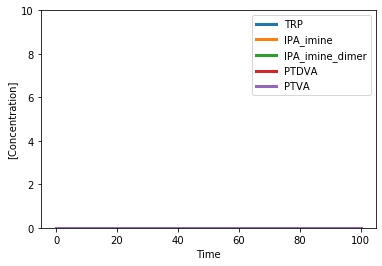

In [3]:
import numpy as np
import pylab as plt




timepoints = np.linspace(0,100,1000)



results_2,_ = liposome_1_ss1.simulateWithBioscrape(timepoints)

#print(results_2)

X_id11 = liposome_1_ss1.getSpeciesByName('TRP').getId()
X_id21 = liposome_1_ss1.getSpeciesByName('IPA_imine').getId()
X_id31 = liposome_1_ss1.getSpeciesByName('IPA_imine_dimer').getId()
X_id41 = liposome_1_ss1.getSpeciesByName('PTDVA').getId()
X_id51 = liposome_1_ss1.getSpeciesByName('PTVA').getId()
X_id61 = liposome_2_ss2.getSpeciesByName('V').getId()
#X_id71 = combined_model.getSpeciesByName('DV', compartment = 'liposome_2_internal').getId()
#X_id81 = combined_model.getSpeciesByName('ahl').getId()







plt.plot(timepoints, results_2[X_id11], linewidth = 3, label = 'TRP')
plt.plot(timepoints, results_2[X_id21], linewidth = 3, label = 'IPA_imine')
plt.plot(timepoints, results_2[X_id31], linewidth = 3, label = 'IPA_imine_dimer')
plt.plot(timepoints, results_2[X_id41], linewidth = 3, label = 'PTDVA')
plt.plot(timepoints, results_2[X_id51], linewidth = 3, label = 'PTVA')
#plt.plot(timepoints, results_1[X_id6], linewidth = 3, label = 'V')
#plt.plot(timepoints, results_1[X_id7], linewidth = 3, label = 'DV')
#plt.plot(timepoints, results_1[X_id8], linewidth = 3, label = 'ahl')




plt.ylim(0, 10)



plt.xlabel('Time')
plt.ylabel('[Concentration]')
plt.legend()
plt.show()


